In [59]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing()

In [29]:
(eps, eps0, alpha, 
 dt, dLambda_dQ, k) = sp.symbols(r'epsilon epsilon_0 alpha \delta\ t \frac{\partial\ \Lambda}{\partial\ Q} k')

In [247]:
subs_dict = {alpha: 8.0, dLambda_dQ: 8.0, k: 1.0, dt: 0.125}
time_constant = -(alpha - dLambda_dQ - k**2).subs(subs_dict)

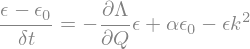

In [248]:
pert_eq = sp.Eq((eps - eps0) / dt,
                alpha * eps0 - dLambda_dQ * eps - k**2 * eps)
display(pert_eq)

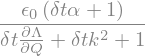

In [249]:
sol = sp.solve(pert_eq, eps)[0]
display(sol)

In [250]:
numerical_sol = sol.subs(subs_dict)

coeff = numerical_sol.args[0]
display(numerical_sol)

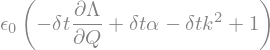

In [251]:
series = sp.series(sol, dt, n=2).removeO()
series = sp.factor(series, eps0)
display(series)

In [256]:
n = 100
delta_t = 0.125

t_ar = float(dt.subs(subs_dict)) * np.arange(n)

In [277]:
eps_ar = np.zeros(t_ar.shape)
eps_ar[0] = 6.8e-3
for i in range(n - 1):
    # eps_ar[i + 1] = coeff * eps_ar[i]
    # eps_ar[i + 1] = (1 - time_constant * delta_t) * eps_ar[i]
    eps_ar[i + 1] =  * eps_ar[i]

In [278]:
# eps_ar = eps_ar[0] * ((1 - time_constant * delta_t)**np.arange(n))

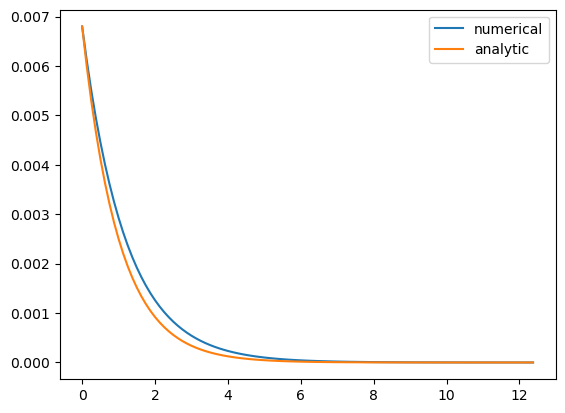

In [279]:
plt.plot(t_ar, eps_ar, label='numerical')
plt.plot(t_ar, eps_ar[0] * np.exp(-float(time_constant) * t_ar), label='analytic')
plt.legend()

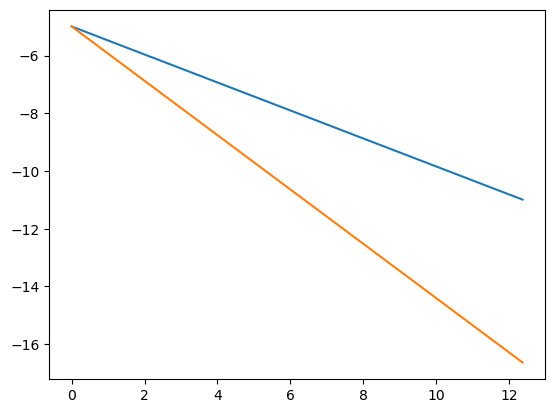

In [259]:
plt.plot(t_ar, np.log(eps_ar))
plt.plot(t_ar, -float(coeff) * t_ar + np.log(eps_ar[0]))